# Algoritimo genético: minimizar a função x²+y².

![1](https://github.com/alvaromfcunha-c210/aula9/blob/master/imagens/1.png?raw=1)

### Modelando conjunto binário:

In [7]:
import numpy as np

class BitSet:

  #Construtor que irá criar um objeto BitSet com um tamanho especificado size
  def __init__(self, size):
    #O valor "1" é usado para criar uma matriz (array) NumPy unidimensional.
    #O parâmetro "False" define que todos os bits estão "inativos", ou seja,
    #todos os genes do cromossomo estãao "inativos".
    self.bits = np.full((1, size), False)

  #O método get permite obter o valor de um bit específico
  #na posição index da sequência. Ele retorna "True" se o bit estiver "ativo" e "False" se estiver inativo.
  def get(self, index):
    #O "0" é usado para acessar a única linha da "matriz".
    #O "index" é a posção dentro do array unidimensional que acessa o elemento na posição desejada
    #está sendo usada como se fosse uma matriz bidimensional, e o índice 0 é usado para acessar a única "linha" dessa "matriz".
    return self.bits[0, index]

  #Defini-se o valor de um bit na posição "index" como o valor especificado "value".
  def set(self, index, value):
    self.bits[0, index] = value

  #Usado para realizar a mutação, neste caso um gene (bit) pode mudar seu estado
  #de ativo para inativo ou de inativo para ativo.
  #A escolha do gene a ser mutado será mediante a uma probabilidade
  def flip(self, index):
    self.bits[0, index] = not self.bits[0, index]

  def debug(self):
    print(self.bits)

### Modelando o Cromossomo:

```
Genotípo com 10 bits:
  ##### #####
    |     |_ valor de y.
    |_ valor de x.

Para cada variável: 4 bits para valor numérico e 1 bit para sinal (vvvvs).
Menor bit significativo a esquerda.
```

### Exemplo

```
1º) Suponha que a sequência de bits seja:
[True, False, False, True, True, False, True, False, True, True]

2º) Os primeiros 5 bits [True, False, False, True, True] podem ser interpretados como o valor binário 10011, que em decimal é -9.
Portanto, o valor de x é -9

3º) Já os últimos 5 bits [False, True, False, True, True] podem ser interpretados como o valor binário 01011, que em decimal é -5.
Portanto, o valor de y é -5.
```

In [8]:
import random

class Chromossome:

  #Instanciando o cromossomo com os valores de x e y (caso não sejam atribuidos são gerados valores aleatórios entre -15 e 15).
  def __init__(self, x = None, y = None):
    if x == None:
      x = random.randint(-15, 15)

    if y == None:
      y = random.randint(-15, 15)

    self.__genes = Chromossome.get_genotype(x, y)

  #O método get_genes retorna o genótipo atual
  def get_genes(self):
    return self.__genes

  #O método set_genes permite definir um novo genótipo para o cromossomo.
  def set_genes(self, genes):
    self.__genes = genes

  #Retorna uma representação em string do cromossomo, que inclui o genótipo e o fenótipo do cromossomo.
  def __repr__(self):
    chr_str = "G = ["

    #Percorre os 10 primeiros bits do genótipo e os concatena em uma string.
    for i in range(10):
      chr_str += (i == 5 and " " or "") + (self.__genes.get(i) and "1" or "0")

    #O método get_fenotype para calculará o fenótipo a partir do genótipo
    #e adiciona os valores do fenótipo à string de representação.
    x, y = Chromossome.get_fenotype(self.__genes)

    chr_str += "], F = [" + str(x) + ", " + str(y) + "]"

    return chr_str

  @staticmethod
  def get_genotype(x, y):
    '''
      Método estático que retorna o genótipo dado o valor de x e y.
      Cada bit pode conter 1 ou 0.
    '''
    bits = BitSet(10)

    xy_binary = "{:05b}".format(x) + "{:05b}".format(y)

    #Para cada posição i no loop, o método set do objeto BitSet é usado para definir o valor do bit em bits
    #com base no valor do bit correspondente na sequência binária xy_binary.
    #Se xy_binary[i] for igual a '1', o bit em bits na posição i é definido como True, caso contrário, é definido como False.
    for i in range(10):
      bits.set(i, xy_binary[i] == '1')

    #Retornando o genótipo
    return bits

  @staticmethod
  def get_fenotype(genes):
    '''
      Método estático que retorna o valor de x e y dado o genótipo.
      Se o genótipo de x é 10011, o seu fenótipo é -9.
      Se o genótipo de y é 01011, o seu fenótipo é -5.
    '''
    x = (8 * genes.get(0) +
        4 * genes.get(1) +
        2 * genes.get(2) +
        1 * genes.get(3))

    if (genes.get(4) == 1):
        x *= -1

    y = (8 * genes.get(5) +
        4 * genes.get(6) +
        2 * genes.get(7) +
        1 * genes.get(8))

    if (genes.get(9) == 1):
        y *= -1

    return x, y

### Funções de avaliação do problema:

In [9]:
class Problem:

  #Calculando a nossa função objetivo
  @staticmethod
  def f(x, y):
    '''
      x²+y²
    '''
    return x**2 + y**2

  @staticmethod
  def f_chromossome(chromossome):

    #O método get_genes do cromossomo é usado para obter o genótipo, e em seguida,
    #usa-se o método get_fenotype da classe Chromossome para calcular os valores de x e y a partir do genótipo.
    x, y = Chromossome.get_fenotype(chromossome.get_genes())

    #Retorna o cálculo da função objetivo
    return Problem.f(x, y)

  #OBS:
  #O processo de seleção, que simula a "seleção natural", utiliza a função de avaliação
  #Determinando assim a "qualidade" de um indivíduo/cromossomo

  @staticmethod
  #Método que calculará a função de avaliação
  def g(x, y):
    '''
      1/(x²+y²) + 1
      Usado como função de fitness (função de avaliação).
      Valor varia de 0 à 1 e quanto mais próximo de 1, melhor.
    '''
    return 1 / (1 + Problem.f(x, y))

  #Calcula o fitness (valor da função de avaliação) com base no cromossomo fornecido.
  #Ela obtém o genótipo do cromossomo e, em seguida, calcula o fitness usando a função g(x, y) definida anteriormente.
  @staticmethod
  def g_chromossome(chromossome):
    '''
      Retorna fitness dado o cromossomo.
    '''
    x, y = Chromossome.get_fenotype(chromossome.get_genes())
    return Problem.g(x, y)


  @staticmethod
  def f_average(population):
    '''
      Calcula a média dos valores de f(x, y) para todos os cromossomos na população, usando a função f_chromossome.
      Ela percorre a lista de cromossomos, calcula o valor de f(x, y) para cada um e, em seguida, retorna a média desses valores.
    '''
    avg = 0
    for chromossome in population:
      avg += Problem.f_chromossome(chromossome)
    avg /= len(population)
    return avg

  @staticmethod
  def g_average(population):
    '''
      Calcula a média dos valores de fitness (usando a função g(x, y)) para todos os cromossomos na população.
    '''
    avg = 0
    for chromossome in population:
      x, y = chromossome.get_fenotype(chromossome.get_genes())
      avg += Problem.g(x, y)
    avg /= len(population)
    return avg

### Funções para operações com cromossomos:

In [10]:
class GeneticFunctions:
  @staticmethod
  def selection(population):
    '''
      Seleciona 2 cromossomos diferentes de forma aleatória.
    '''
    parent1 = random.choice(population)
    parent2 = random.choice(population)

    #Caso o parent1 seja igual ao paret2
    #A escolha dos pais ocorrerá, novamente
    while parent1 is parent2:
      parent1 = random.choice(population)
      parent2 = random.choice(population)

    return parent1, parent2

  @staticmethod
  def crossover(population, parent1, parent2):
    '''
      Faz o cruzamento de 2 cromossomos, gerando 2 filhos e inserindo-os na população.
    '''
    #Definindo o ponto em que realizará o crossover. Entre os índices 1 e 9
    crossover_point = random.randint(1, 9)

    #Obtendo os genes dos pais
    parent1_genes = parent1.get_genes()
    parent2_genes = parent2.get_genes()

    #Instanciando dois objetos que serão os filhos
    child1_genes = BitSet(10)
    child2_genes = BitSet(10)


    for i in range(crossover_point):
      #Copia os genes do pai1 até o ponto de cruzamento.
      child1_genes.set(i, parent1_genes.get(i))
      #Copia os genes do pai2 até o ponto de cruzamento.
      child2_genes.set(i, parent2_genes.get(i))

    for i in range(crossover_point, 10):
      #Recebendo o restante dos genes que pertence ao pai2.
      child1_genes.set(i, parent2_genes.get(i))
      #Recebendo o restante dos genes que pertence ao pai1.
      child2_genes.set(i, parent1_genes.get(i))

    #Instanciando os filhos na Classe Cromossomos
    #Definindo o genótipo de ambos

    child1 = Chromossome()
    child1.set_genes(child1_genes)

    child2 = Chromossome()
    child2.set_genes(child2_genes)

    #Inserindo os dois filhos gerados na população
    population.append(child1)
    population.append(child2)

    return crossover_point

  @staticmethod
  def mutation(population, mutation_prob):
    '''
      Gera mutação em 1 cromossomo aleatório da população dada a probabilidade de mutação.
    '''
    prob = random.uniform(0, 1)

    #Se prob for menor que mutation_prob, então ocorre uma mutação.
    if prob < mutation_prob:
      #Selecionando um cromossomo aleatório da população
      target = random.choice(population)

      #Escolhe um ponto aleatório do cromossomo para realizar a mutação
      mutation_point = random.randint(0, 9)

      #Pegando os genes do cromossomo escolhido
      genes = target.get_genes()
      #Realiza a mutação mais simples, que é do tipo flip
      genes.flip(mutation_point)

      #Se a mutação ocorreu, retornará "True" e o ponto da mutação
      return True, mutation_point

    #Se a mutação não ocorreu retorna "False" e "None"
    return False, None

  #Elite: a população será composta pelos indivíduos mais adaptados
  @staticmethod
  def elitism(population):
    '''
      Remove 2 dos piores cromossomos da população.
    '''
    for _ in range(2):
      worst_individual = GeneticFunctions.find_worst_chromossome(population)
      population.remove(worst_individual)

    return worst_individual

  @staticmethod
  def find_best_chromossome(population):
    '''
      Retorna o melhor cromossomo dada a população.
    '''
    best_chromossome = None

    #Percorrendo a população e calculando o seu valor de fitness
    for chromossome in population:
      score = Problem.g_chromossome(chromossome)

      #Esta linha verifica se o best_chromossome atualmente selecionado é None
      #(ou seja, nenhum cromossomo foi selecionado anteriormente) ou se o score do cromossomo atual chromossome é maior (melhor)
      #do que o score do best_chromossome atualmente armazenado.
      #Se uma dessas condições for verdadeira, o best_chromossome é atualizado para ser igual a chromossome.
      if best_chromossome is None or score > Problem.g_chromossome(best_chromossome):
        best_chromossome = chromossome

    return best_chromossome

  #Esta função encontra o pior cromossomo da população com base no valor da função de fitness (score).
  @staticmethod
  def find_worst_chromossome(population):
    '''
      Retorna o pior cromossomo dada a população.
    '''
    worst_chromossome = None

    #Percorre a população e compara o score de cada cromossomo usando a função de fitness definida em Problem.g_chromossome.
    for chromossome in population:
      score = Problem.g_chromossome(chromossome)

      if worst_chromossome is None or score < Problem.g_chromossome(worst_chromossome):
        worst_chromossome = chromossome

    return worst_chromossome

### Execução:

In [11]:
def executar(tam_populacao, n_geracoes, prob_mutacao):

  #Lista que armazenará os cromossomos
  populacao = []

  #Itera tam_populacao vezes
  for _ in range(tam_populacao):
    #A cada iteração, cria um novo cromossomo e adiciona na lista da população
    populacao.append(Chromossome())

  #Lista que armazena as pontuações (fitness), ao longo das gerações.
  pontuacoes = []
  #Calculando a pontuação inicial, usando a função de fitness
  pontuacao_inicial = Problem.g_average(populacao)
  pontuacoes.append(pontuacao_inicial)

  #Lista que armazena as médias de f(x, y), ao longo das gerações.
  medias_f = []
  #Calculando a média f inicial, usando a função objetivo
  media_f_inicial = Problem.f_average(populacao)
  medias_f.append(media_f_inicial)

  #Loop que itera através das gerações especificadas (n_geracoes)
  for geracao in range(n_geracoes):

    #Selecionando dois pais aleatórios
    pai1, pai2 = GeneticFunctions.selection(populacao)

    #Realizando o crossover e gerando dois filhos, a posição do crossover será armazenda
    pos_crossover = GeneticFunctions.crossover(populacao, pai1, pai2)
    #Verificando se houve a mutação e a posição em que ela ocorreu
    teve_mutacao, pos_mutacao = GeneticFunctions.mutation(populacao, prob_mutacao)
    #Eliminado o pior cromossomo da população
    pior_cromossomo = GeneticFunctions.elitism(populacao)

    pontuacao = Problem.g_average(populacao)
    pontuacoes.append(pontuacao)

    media_f = Problem.f_average(populacao)
    medias_f.append(media_f)

  melhor_cromossomo = GeneticFunctions.find_best_chromossome(populacao)

  return melhor_cromossomo, pontuacoes, medias_f

def executar_com_prints(tam_populacao, n_geracoes, prob_mutacao):
  populacao = []
  for _ in range(tam_populacao):
    populacao.append(Chromossome())

  print('População inicial:', populacao)

  pontuacoes = []
  pontuacao_inicial = Problem.g_average(populacao)
  pontuacoes.append(pontuacao_inicial)

  print('Pontuação inicial:', pontuacao_inicial)

  medias_f = []
  media_f_inicial = Problem.f_average(populacao)
  medias_f.append(media_f_inicial)

  print('Média de f(x,y) inicial:', media_f_inicial)

  for geracao in range(n_geracoes):
    print('Geração:', geracao)

    pai1, pai2 = GeneticFunctions.selection(populacao)
    print('\tSelecionados:', pai1, pai2)

    pos_crossover = GeneticFunctions.crossover(populacao, pai1, pai2)
    print('\tCrossover entre selecionados na posição:', pos_crossover)

    teve_mutacao, pos_mutacao = GeneticFunctions.mutation(populacao, prob_mutacao)
    print('\tTeve mutação? ', teve_mutacao)
    if(teve_mutacao):
      print('\t\tNa posição:', pos_mutacao)

    pior_cromossomo = GeneticFunctions.elitism(populacao)
    print('Foi eliminado o pior cromossomo:', pior_cromossomo, Problem.g_chromossome(pior_cromossomo))

    pontuacao = Problem.g_average(populacao)
    print(f'Pontuação da geração {geracao}:', pontuacao)

    media_f = Problem.f_average(populacao)
    medias_f.append(media_f)
    print(f'Média de f(x,y) da geração {geracao}:', media_f)

    pontuacoes.append(pontuacao)

  melhor_cromossomo = GeneticFunctions.find_best_chromossome(populacao)

  return melhor_cromossomo, pontuacoes, medias_f

melhor_cromossomo, pontuacoes, medias_f = executar_com_prints(
  tam_populacao=10,
  n_geracoes=50,
  prob_mutacao=0.05
)

print('Melhor cromossomo:', melhor_cromossomo, Problem.g_chromossome(melhor_cromossomo))

População inicial: [G = [01101 01011], F = [-6, -5], G = [01100 00010], F = [6, 1], G = [01001 01101], F = [-4, -6], G = [01010 00111], F = [5, -3], G = [00101 00111], F = [-2, -3], G = [01110 01001], F = [7, -4], G = [00000 01111], F = [0, -7], G = [00011 00110], F = [-1, 3], G = [00010 01011], F = [1, -5], G = [01000 00111], F = [4, -3]]
Pontuação inicial: 0.036287192781923217
Média de f(x,y) inicial: 37.2
Geração: 0
	Selecionados: G = [01001 01101], F = [-4, -6] G = [00011 00110], F = [-1, 3]
	Crossover entre selecionados na posição: 1
	Teve mutação?  False
Foi eliminado o pior cromossomo: G = [01101 01011], F = [-6, -5] 0.016129032258064516
Pontuação da geração 0: 0.04413683958470453
Média de f(x,y) da geração 0: 30.8
Geração: 1
	Selecionados: G = [01100 00010], F = [6, 1] G = [00011 00110], F = [-1, 3]
	Crossover entre selecionados na posição: 8
	Teve mutação?  False
Foi eliminado o pior cromossomo: G = [01001 01101], F = [-4, -6] 0.018867924528301886
Pontuação da geração 1: 0.052

### Plot do fitness por geração:

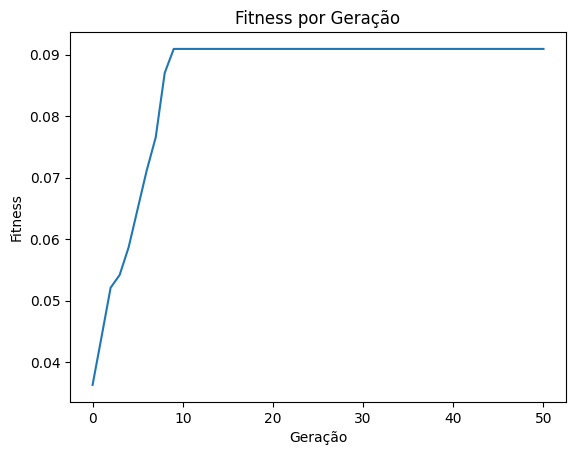

In [12]:
import matplotlib.pyplot as plt

plt.gca().set_xlabel('Geração')
plt.gca().set_ylabel('Fitness')
plt.gca().set_title('Fitness por Geração')
plt.plot(range(len(pontuacoes)), pontuacoes)
plt.show()

```
O principal indicador de sucesso é se a média da função de fitness g(x, y) está aumentando ao longo das gerações.
Isso indica que a população está se aproximando de soluções melhores, ou seja, está convergindo para um máximo da função de fitness.
```

### Plot da média de f(x,y) por geração:

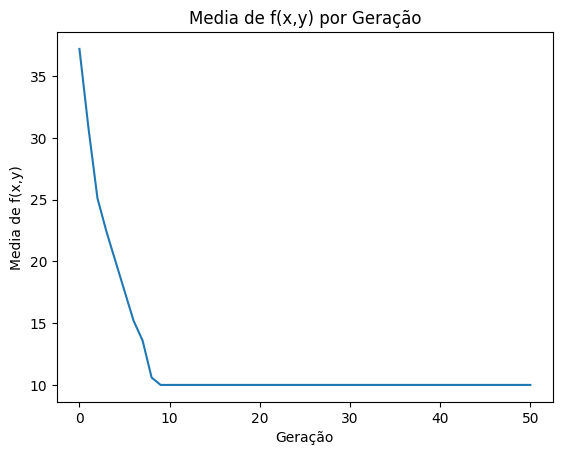

In [13]:
plt.gca().set_xlabel('Geração')
plt.gca().set_ylabel('Media de f(x,y)')
plt.gca().set_title('Media de f(x,y) por Geração')
plt.plot(range(len(medias_f)), medias_f)
plt.show()

```
Se a média da função f(x, y) está diminuindo ao longo das gerações.
Isso indica que a população está se aproximando de soluções melhores, ou seja, está convergindo para um mínimo da função.
```